<h1 align="center"> Decision Trees using Python </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image

%matplotlib inline

### Load the Dataset

Make information about dataset?

Parameters | Number
--- | ---
Classes | 3
Samples per class | [59, 71, 48]
Samples total | 178
Dimensionality | 13
Features | Real Positive

We will be using the [House Sales in King County dataset](https://www.kaggle.com/harlfoxem/housesalesprediction).

In [2]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Python_Tutorials/master/Kaggle/HousingSalesKC/kc_house_data.csv'

df = pd.read_csv(url)

In [3]:
df.drop(['date', 'id', 'yr_renovated', 'zipcode', 'lat', 'long']
        , axis = 1
        , inplace = True)

In [4]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062


In [5]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Splitting Data into Training and Test Sets

One of the benefits of Decision Trees is that you don't have to standardize your data unlike PCA and logistic regression which are [sensitive to effects of not standardizing your data](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

In [6]:
features = df.loc[:, df.columns != 'price']
target = df.loc[:, ['price']]

In [7]:
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [8]:
print(X_train.shape)

(16209, 14)


In [9]:
print(y_train.shape)

(16209, 1)


In [10]:
print(X_test.shape)

(5404, 14)


In [11]:
print(y_test.shape)

(5404, 1)


### Standardizing the Data (Not Needed)

One of the benefits of Decision Trees is that you don't have to standardize your data unlike PCA and logistic regression which are [sensitive to effects of not standardizing your data](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

## Regression Tree

<b>Step 1:</b> Import the model you want to Use

In scikit-learn, all machine learning models are implemented as Python classes

In [12]:
from sklearn.tree import DecisionTreeRegressor

<b>Step 2</b>: Make an instance of the Model

In [13]:
regr = DecisionTreeRegressor(max_depth = 3)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features like bedrooms, bathrooms, sqft_living, sqft_lot) and y (price)

In [14]:
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<b>Step 4:</b> Predict the value of housing not seen before. 

(modify statement for the regression tree) To predict a class of a new instance given its feature measurements using the decision tree, start at the root of the decision tree and take the decision at the each level based on the appropriate feature measurement until you get to the leaf node. The prediction is just the majority class of the instances in that leaf node.

Uses the information the model learned during the model training process

In [15]:
# Predict for 1 observation 
regr.predict(X_test.iloc[0].values.reshape(1, -1))

array([783307.27069927])

## Tuning Model Section NEEDED

## Visualize Decision Tree

https://github.com/mGalarnyk/Installations_Mac_Ubuntu_Windows/blob/master/Homebrew/DataSciencePortfolioIris.ipynb

In [16]:
from sklearn import tree

In [20]:
tree.export_graphviz(regr,
                     out_file = 'housingRTree.dot',
                     feature_names = features.columns.values)

In [22]:
!dot -Tpng housingRTree.dot -o housingRTree.png

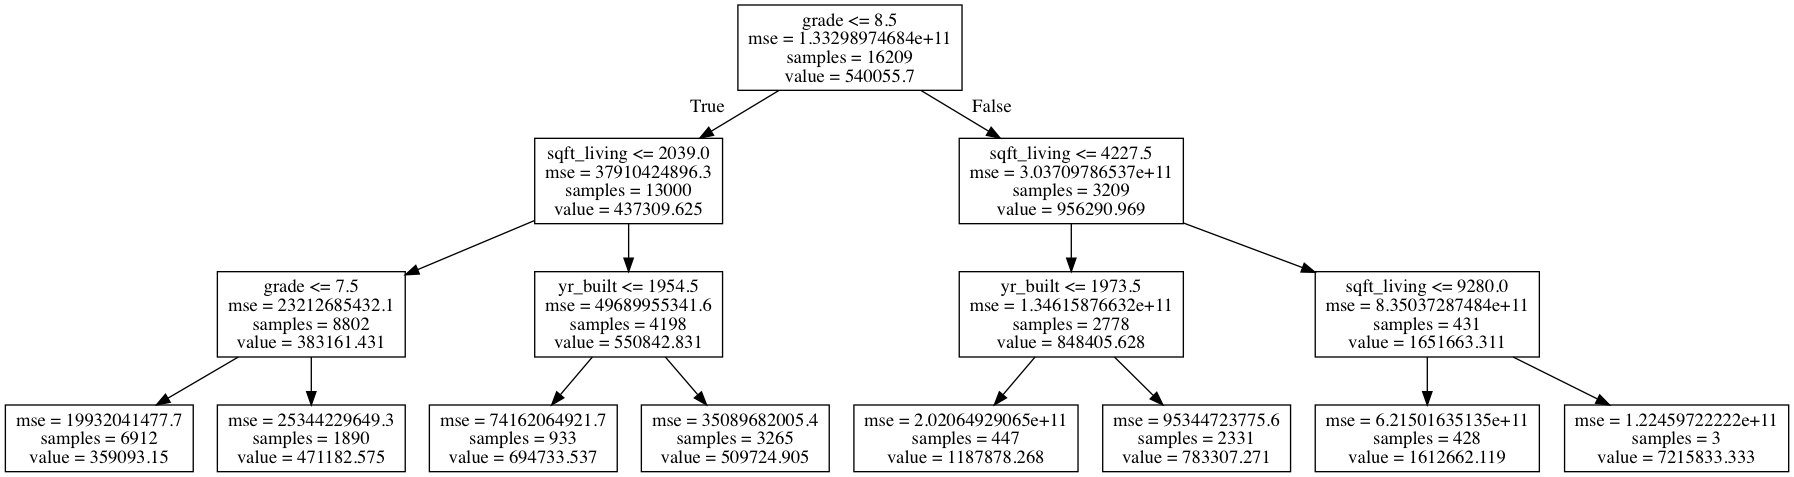

In [23]:
PATH = !pwd
Image(filename = PATH[0] + "/housingRTree.png")

In [40]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Download and Load the Data

In [41]:
# You can add the parameter data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')

In [42]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [43]:
# These are the images
mnist.data.shape

(70000, 784)

In [44]:
# These are the labels
mnist.target.shape

(70000,)

## Splitting Data into Training and Test Sets

In [45]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [46]:
print(train_img.shape)

(60000, 784)


In [47]:
print(train_lbl.shape)

(60000,)


In [48]:
print(test_img.shape)

(10000, 784)


In [49]:
print(test_lbl.shape)

(10000,)


## Standardizing the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data

Notebook going over the importance of feature Scaling: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)

<b>Step 0:</b> Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [51]:
from sklearn.decomposition import PCA

Make an instance of the Model

In [52]:
pca = PCA(.99)

Fit PCA on training set. <b>Note: you are fitting PCA on the training set only</b>

In [53]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Apply the mapping (transform) to <b>both</b> the training set and the test set. 

In [54]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

<b>Step 1: </b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [55]:
from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

In [56]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [57]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

<b>Step 4:</b> Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [58]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([ 1.])

In [59]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array([ 1.,  9.,  2.,  2.,  7.,  1.,  8.,  3.,  3.,  7.])

## Measuring Model Performance

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [60]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9161
